![DSL_logo](https://github.com/BrockDSL/Python_Intro_Text_analysis/blob/master/dsl_logo.png?raw=1)


# Introduction to Text Analysis with Python

Welcome to the Digital Scholarship Lab introduction to Text Analysis with Python class. In this class we'll learn the basics of text analysis:

- parsing text
- analyzing the text

We'll use our own home made analysis tool first, then we'll use a python library called `TextBlob` to use some built-in analysis tools.

This workshop assumes you've completed our Intro to Python [workshop](https://brockdsl.github.io/Intro_to_Python_Workshop/)

We'll use the Zoom's chat feature to interact.

Be sure to enable line numbers by looking for the 'gear' icon and checking the box in the 'Editor' panel.

## EG. Scrabble!

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5d/Scrabble_game_in_progress.jpg" width =500x>

Scrabble is a popular game where players try to score points by spelling words and placing them on the game board. We'll use Scrabble scoring our our first attempt at text analysis. This will demonstart the basics of how Text Analysis works.

The function below gives you the Scrabble scored of any word you give it.

In [8]:
# This function will return the Scrabble score of a word

def scrabble_score(word):
    
    #Dictionary of our scrabble scores
    score_lookup = {
        "a": 1,
        "b": 3,
        "c": 3,
        "d": 2,
        "e": 1,
        "f": 4,
        "g": 2,
        "h": 4,
        "i": 1,
        "j": 8,
        "k": 5,
        "l": 1,
        "m": 3,
        "n": 1,
        "o": 1,
        "p": 3,
        "q": 10,
        "r": 1,
        "s": 1,
        "t": 1,
        "u": 1,
        "v": 4,
        "w": 4,
        "x": 8,
        "y": 4,
        "z": 10,
        "\n": 0, #just in case a new line character jumps in here
        " ":0 #normally single words don't have spaces but we'll put this here just in case
        
    }
    
    total_score = 0
    
    #We look up each letter in the scoring dictionary and add it to a running total
    #to make our dictionary shorter we are just using lowercase letters so we need to
    #change all of our input to lowercase with .lower()
    for letter in word:
        total_score = total_score + score_lookup[letter.lower()]
    
    return total_score

Text Analysis is a process comprised of three basic steps:
1. Identifying the text (or corpus) that you'd like to an analyze
1. Apply the analysis to your prepared text
1. Review the results

In our very basic example of scrabble we just are interested in finding the points we would get for spelling a specific word. 

In a more complex example with a larger corpus you can do any of the following types of analysis:
- determine the sentiment (positive / negative tone) of the text
- quantify how complex a piece of writing is based on the vocabulary it uses
- determine what topics are in your corpus
- classify your text into different categories based on what it is about

Of course, there are many other different outcomes you can get from peforming text analysis.

Try questions Q1 - Q2 and type "All Done" in the chat box when you are done.

## Q1 

Score your name by creating the text variable _name_ on line 1.

How many Points do you get for your name? Complete the expression below to find out the scrabble score of your name

In [17]:
name = "Daiva"
print("Score for my name is:", scrabble_score(name))


Score for my name is: 9


## Q2

Score your pet's name (or favorite character from a story)  by creating the text variable _pet_name_ on line 1.
Does your name or the name of your pet score higher in Scrabble?

In [18]:
pet_name = "Lucky"
print("Score for my pet's name is:",scrabble_score(pet_name))

#Compare to see which gets more points!
if scrabble_score(pet_name) > scrabble_score(name):
    print("My pet's name scores more points!")
else:
    print("My name scores more (or the same) amount of points as my pets name")



Score for my pet's name is: 14
My pet's name scores more points!


# Beyond the basics

We just completed a very basic text analysis where we analyzed two different bits of text to see which one scores higher in Scrabble. Let's expand this idea to a more complex example using the [TextBlob](https://textblob.readthedocs.io/en/dev/) Python Library. There are other more complex libraries that you can use for text analysis, we are using more simple solutions so we can spend more time looking at results compared to setting up the code.

# Installing and Loading the Libraries

This next cell will install and load the requires libraries that will do the text analysis.

In [19]:
#Install textblob using magic commands
#Only needed once
%pip install textblob
#%python -m textblob.download_corpora
#%pip install textblob.download_corpora

from textblob import TextBlob

import pandas as pd
import nltk
from nltk.corpus import stopwords
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('wordnet')


#Let's make sure our previews show more information
pd.set_option('display.max_colwidth', 999)

#Classifier for laster 
from textblob.classifiers import NaiveBayesClassifier
from textblob import Word

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Corpus

![winnie_splash](https://raw.githubusercontent.com/BrockDSL/Text_Analysis_with_Python/master/winnie_splash.png)

Corpus is a fancy way of saying the text that we will be looking at. Cleaning up a corpus and getting it ready for analysis is a big part of the process, once that is done the rest is easy. For our example we are going to be looking at some entries from the 1900 [diary](https://dr.library.brocku.ca/handle/10464/7282) of Winnie Beam. The next cell will load this corpus into a Pandas dataframe and show us a few entires.

In [20]:
winnie_corpus = pd.read_csv('https://raw.githubusercontent.com/BrockDSL/Text_Analysis_with_Python/master/winnie_corpus.txt', header = None, delimiter="\t")
winnie_corpus.columns = ["page","date","entry"]
winnie_corpus['date'] = pd.to_datetime(winnie_corpus['date'])
winnie_corpus['entry'] = winnie_corpus.entry.astype(str)

#preview our top entries
winnie_corpus.head()

,page,date,entry
0,7,1900-01-01,"New Year. First day of 1900 Charlie Merritt died at Grand Forks British Columbia yesterday of typhoid fever. To-day is election day and pap went up about 3 o'clock and did not get back until nearly 10. He brought us some candy chocolate drops. We had a very fat goose for dinner, not a very young one. Had to have good teeth."
1,7,1900-01-02,"Went uptown in afternoon. Was up to Eckardt's but Miss Macfarlane was not there so I did not get what I wanted. Called at office and Nettie came home with me for tea. Mr Carman came over and borrowed my Mildred books. Then Leta came & borrowed my German Grammar as she forgot hers & left it at school before holiday. Papa, mamma, Nettie & I played crokinole. Mamma & I beat. The 2nd Contingent left for Toronto today to go to South Africa. Dr King's som went."
2,8,1900-01-03,"Mrs Trusty was here washing School started to-day, but I was not going this week. Mamma went to the church and then to Mrs Chatfields Took her the church books. The queen Street Baptist church had a service of praise this evening. Mrs Chapman is organist & Mrs Read-Muir sang Mrs George Armstrong has a daughter was born on New Year's day."
3,8,1900-01-04,"Went over to Carman's to have Ella go with me to Dunn's greenhouse. We went about half past three. I brought a primrose Miss Chaplin was in there. Mamma went to Mrs Klotz at home Beatrice helped. Papa & I went to Sunday School entertainment at night. Had a very long programme. There was a dialogue called ""Aunt Ketty's shopping which was good, and a shaving scene. Mr perry gave a tableful of prizes away. Beatrice came home with us. They had a drill of girls & they sang ""Soldiers of the Queen"""
4,9,1900-01-05,"Sweep day. I read ""At the Camerons"" in the ""Harper's Young People"" when mamma was sweeping. We had a beggar in afternoon asking for a few cents as he had a long way to go. Rats! Went over to Lee's in afternoon after eggs. Took a ""Young Ladies Journal"" Mrs Pay lent me. Her kitty has a sore tail. Mrs Malcolmson came after eggs when I was there. She got large sum of 2. Had some candy at night."


# Measuring Sentiment

We can analyze the _sentiment_ of the text (more [details](https://planspace.org/20150607-textblob_sentiment/).) The next cell demonstrates this:

In [21]:

happy_sentence = "Python is the best programming language ever!"
sad_sentence = "Python is difficult to use, and very frustrating"


print("Sentiment of happy sentence ", TextBlob(happy_sentence).sentiment)
print("Sentiment of sad sentence ", TextBlob(sad_sentence).sentiment)

# polarity ranges from -1 to 1.
# subjectvity ranges from 0 to 1.



Sentiment of happy sentence  Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment of sad sentence  Sentiment(polarity=-0.51, subjectivity=1.0)


## Q3

Try a couple of different sentences in the code cell below. See if you can create something that scores -1 and another that scores 1 for _polarity_. See if you can minimize the _subjectivity_ of your sentence. *Share your answers in the chat box*. 

(We can create a multi line string of text by putting it in triple quotes like the cell following.)

In [23]:
test_sentence = """

"""
print("Score of test sentence is ", TextBlob(test_sentence).sentiment)

Score of test sentence is  Sentiment(polarity=0.0, subjectivity=0.0)


# Adding Sentiment to our Diary entries

This next cell will score each diary entry in a new column that will be added to the dataframe. We loop through each entry, calculate the two scores that represent the sentiment. After all the scores are computed with add them to the dataframe.

In [24]:
#Apply sentiment analysis from TextBlob

polarity = []
subjectivity = []


for day in winnie_corpus.entry:
    #print(day,"\n")
    score = TextBlob(day)
    polarity.append(score.sentiment.polarity)
    subjectivity.append(score.sentiment.subjectivity)
    
winnie_corpus['polarity'] = polarity
winnie_corpus['subjectivity'] = subjectivity


#Let's look at our new top entries
winnie_corpus.head()

,page,date,entry,polarity,subjectivity
0,7,1900-01-01,"New Year. First day of 1900 Charlie Merritt died at Grand Forks British Columbia yesterday of typhoid fever. To-day is election day and pap went up about 3 o'clock and did not get back until nearly 10. He brought us some candy chocolate drops. We had a very fat goose for dinner, not a very young one. Had to have good teeth.",0.205322,0.377286
1,7,1900-01-02,"Went uptown in afternoon. Was up to Eckardt's but Miss Macfarlane was not there so I did not get what I wanted. Called at office and Nettie came home with me for tea. Mr Carman came over and borrowed my Mildred books. Then Leta came & borrowed my German Grammar as she forgot hers & left it at school before holiday. Papa, mamma, Nettie & I played crokinole. Mamma & I beat. The 2nd Contingent left for Toronto today to go to South Africa. Dr King's som went.",-0.020000,0.120000
2,8,1900-01-03,"Mrs Trusty was here washing School started to-day, but I was not going this week. Mamma went to the church and then to Mrs Chatfields Took her the church books. The queen Street Baptist church had a service of praise this evening. Mrs Chapman is organist & Mrs Read-Muir sang Mrs George Armstrong has a daughter was born on New Year's day.",0.136364,0.454545
3,8,1900-01-04,"Went over to Carman's to have Ella go with me to Dunn's greenhouse. We went about half past three. I brought a primrose Miss Chaplin was in there. Mamma went to Mrs Klotz at home Beatrice helped. Papa & I went to Sunday School entertainment at night. Had a very long programme. There was a dialogue called ""Aunt Ketty's shopping which was good, and a shaving scene. Mr perry gave a tableful of prizes away. Beatrice came home with us. They had a drill of girls & they sang ""Soldiers of the Queen""",0.054583,0.384167
4,9,1900-01-05,"Sweep day. I read ""At the Camerons"" in the ""Harper's Young People"" when mamma was sweeping. We had a beggar in afternoon asking for a few cents as he had a long way to go. Rats! Went over to Lee's in afternoon after eggs. Took a ""Young Ladies Journal"" Mrs Pay lent me. Her kitty has a sore tail. Mrs Malcolmson came after eggs when I was there. She got large sum of 2. Had some candy at night.",0.030357,0.345714


Now that we have daily sentiment values, let's try to visualize how they go up and down over the course of the first 3 months of the year.

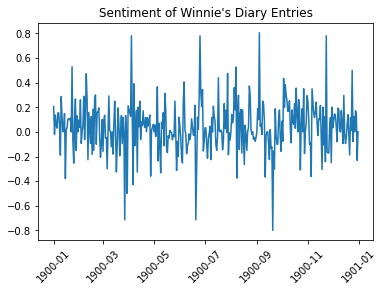

In [25]:
#Let's graph out the sentiment as it changes day to day.

plt.plot(winnie_corpus["date"],winnie_corpus["polarity"])
plt.xticks(rotation='45')
plt.title("Sentiment of Winnie's Diary Entries")
plt.show()

## Interesting spikes?

We see some really strong negative and positive spikes in the sentiment. Let's just take a look at some of those entries. Run the next three cells to look at the individual negative and positive entries.

In [26]:
#instead of looking at just the hightest and lowest value we'll reduce that number by a threshold value
#that way we can see numbers that are close to the highest sentiment and the lowest sentiment
#we'll start with 20%.


threshold = 0.2

In [27]:
#Very Negative
bad_sentiment = winnie_corpus["polarity"].min()

#Reduce this number by threshold %
bad_sentiment = bad_sentiment - (bad_sentiment * threshold)

winnie_corpus[winnie_corpus["polarity"] <= bad_sentiment]

,page,date,entry,polarity,subjectivity
85,49,1900-03-27,Mamma was out collecting in afternoon at Mrs Coy's Mrs Smith's Mrs Reynold's Mrs Pay is sick with grippe and he has been sick. Mrs Varley called on mamma. Papa and Sid went to the Falls again to-night. They me after Mr Herbert (Irrigation) Beatty. Sid came and staid here all night. They got home about 1 o'clock.,-0.714286,0.857143
168,92,1900-06-20,"Wash day. Mrs. Trusty has been sick and Dr. Jory tells her it is paralysis coming on. In the afternoon I practiced & worked at my Harmony until I did not know whether I was on my head or heels. Mamma went uptown, and to the church. She went to pay Mrs. Sullivans for my dress.",-0.714286,0.857143
260,138,1900-09-20,"Nasty gloomy day. Mr McSloy sent papa five trout from Quebec. Had them Tuesday night. They tried to stop the ringing of the 6, 2, 5, & 6 bells. Crazy.",-0.800000,0.950000


In [28]:
#Very Positive
good_sentiment = winnie_corpus["polarity"].max()

#Reduce this number by threshold %
good_sentiment = good_sentiment - (good_sentiment * threshold)

winnie_corpus[winnie_corpus["polarity"] >= good_sentiment]

,page,date,entry,polarity,subjectivity
91,53,1900-04-04,"I sent for some pictures on Friday from Beverly, Mass and they came to-day, but they sent them to the customs, and charged 5 cents Mamma went to the church to auxiliary. Then I went to the service. Mr. Perry spoke on 1 Peter 1.4 verse. The Bishop staid at Merritt's and conducted the Lenten service in St. George's Church yesterday afternoon. Papa brought the pictures home. They are very nice. There are a lot of them on the ""Life of Christ"". Dr & Mrs Klots were here in the evening. They played King Pedro",0.780,1.00
173,94,1900-06-25,"Mamma went out collecting in afternoon. Very warm. In the evening papa caught the pigeons and Mr. Coy and he went to race course & shot them. Dr. Kilmer & Mr. Lovelace did not turn up. Della mamma & I went for a drive. They had an undergraduate Music & Elecution recital to-night at Demill, Did not go. Went home with Dell & over to Dwyer's, Bessie Read was there. Got 12 pictures from Brown & Co. Mr Painter gave papa four snapping turtle eggs on Saturday",0.780,0.78
244,130,1900-09-04,"Was reading ""Three men on Wheels"" when Mrs Tulley and Dr Abbott came in. They wanted papa, mamma & I to go to the Welland House for tea. Dr Abbott hurried up to the office and caught papa. Had a very good supper. They walked home with us. Mrs Tulley told about a good books ""Uarda"" by Ebeer.",0.805,0.69
324,170,1900-11-23,"This morning I went uptown after my pins and to change my library book. Got ""Leofwine the Monk"". Very nice day. Mamma went uptown in the afternoon. McLaren's and Anderson's have their Christmas things in. The Collegiate Cadets have a concert to-night. Miss Murray is to sing, Miss McCallum recite and the flag is to be presented to the cadets.",0.780,1.00


## Q4

Do you agree with the sentiment scores that are applied in the above two cells? Share your thoughts in the chat.

# What else can we get from the text?

We've seen some details about sentiment, but what else can we get from the text? Let's grab a random entry and see what we can find out about it. We'll choose the *22*nd entry.

In [29]:
entry_number = 22
bit_of_corpus = TextBlob(winnie_corpus["entry"][entry_number])
bit_of_corpus

TextBlob("Went to school in the afternoon. Then papa mamma & I went to the Redpath Concert Co. The concert was fine. I never heard anything I liked as well. There were four singers 1 violinist and 1 pianist. Mme Meredith soprano Miss Clary, contralto. Dr Carl Dufft basso Mr Town, Tenor, Miss Von Fursch violinist and Miss Koler pianist all of them were encored twice and Mr Dufft three times. All the ladies got a beautiful boquet. The first part was L. Lehmann's "In a Persian Garden".")

# Sentences and Sentiment

We applied sentiment on to daily entries but we can apply it down to sentences just to see how a score fluctuates.

In [30]:
for sentence in bit_of_corpus.sentences:
    print(sentence)
    print(sentence.sentiment,"\n")

Went to school in the afternoon.
Sentiment(polarity=0.0, subjectivity=0.0) 

Then papa mamma & I went to the Redpath Concert Co.
Sentiment(polarity=0.0, subjectivity=0.0) 

The concert was fine.
Sentiment(polarity=0.4166666666666667, subjectivity=0.5) 

I never heard anything I liked as well.
Sentiment(polarity=0.6, subjectivity=0.8) 

There were four singers 1 violinist and 1 pianist.
Sentiment(polarity=0.0, subjectivity=0.0) 

Mme Meredith soprano Miss Clary, contralto.
Sentiment(polarity=0.0, subjectivity=0.0) 

Dr Carl Dufft basso Mr Town, Tenor, Miss Von Fursch violinist and Miss Koler pianist all of them were encored twice and Mr Dufft three times.
Sentiment(polarity=0.0, subjectivity=0.0) 

All the ladies got a beautiful boquet.
Sentiment(polarity=0.85, subjectivity=1.0) 

The first part was L. Lehmann's "In a Persian Garden".
Sentiment(polarity=0.25, subjectivity=0.3333333333333333) 



# Words in sentences

You can parse through words in a sentence using TextBlob as well. The next cell illustrates this. We'll need to to get to calculate specific sentiment scores in our next section.

In [31]:
for sentence in bit_of_corpus.sentences:
    for word in sentence.words:
        print(word)

Went
to
school
in
the
afternoon
Then
papa
mamma
I
went
to
the
Redpath
Concert
Co
The
concert
was
fine
I
never
heard
anything
I
liked
as
well
There
were
four
singers
1
violinist
and
1
pianist
Mme
Meredith
soprano
Miss
Clary
contralto
Dr
Carl
Dufft
basso
Mr
Town
Tenor
Miss
Von
Fursch
violinist
and
Miss
Koler
pianist
all
of
them
were
encored
twice
and
Mr
Dufft
three
times
All
the
ladies
got
a
beautiful
boquet
The
first
part
was
L
Lehmann
's
In
a
Persian
Garden


## Q5

Another random journal entry. Pick a random number between 1 and the length of the dataframe and update *en_no* in line 1. If you get an interesting result, share it with the class in the chat box.

In [32]:
#Pick a value between 1 and this number
len(winnie_corpus)

363

In [34]:
en_no = 25

another_bit_of_corpus = TextBlob(winnie_corpus["entry"][en_no])

print("Random Entry: \n")
print(another_bit_of_corpus,"\n")

#Go through all of the sentences of this entry and determine their sentiment
for sentence in another_bit_of_corpus.sentences:
    print(sentence)
    print(sentence.sentiment,"\n")

Random Entry: 

We burnt a lamp last night as the gasbills are so high. It is very nice to burn lamps. Did not go to school this morning as it was cold & blustry. 10 below zero. Mr Carman came over with a rat for Pansy to catch it, and the naught thing wouldn't as the rat bit him on the lip. Mamma Mrs Coy and Mattie went to Mrs C. Moore's card party in afternoon from 3 to 6 o'clock Mrs Dudley won first Miss Bate the second and Miss Kate Clark the third prize. The first was a tea cozey, 2nd an orange knife, the third a book. 

We burnt a lamp last night as the gasbills are so high.
Sentiment(polarity=0.08, subjectivity=0.3033333333333333) 

It is very nice to burn lamps.
Sentiment(polarity=0.78, subjectivity=1.0) 

Did not go to school this morning as it was cold & blustry.
Sentiment(polarity=-0.6, subjectivity=1.0) 

10 below zero.
Sentiment(polarity=0.0, subjectivity=0.0) 

Mr Carman came over with a rat for Pansy to catch it, and the naught thing wouldn't as the rat bit him on the li

# Stopwords

Often we want to remove common words (eg. a, the, of) in our corpus before we analyze things. For the most part TextBlob will ignore these words if we use the right analysis. We'll just look at it here to understand the idea.

In [35]:
for word in stopwords.words('english'):
    print(word)

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't


Now let's see how we can remove stopwords from a piece of text. Experiment by changing to a different example sentence.

In [36]:
ex_text = TextBlob("I know this, do you?")


for sentence in ex_text.sentences:
    for word in sentence.words:

        if word.lower() not in stopwords.words('english'):
            print(word)

know


## Lemmatization

Some times analysis requires us to **stem** or **lemmatize** our word so that is becomes a root word. For example the word _cats_ would be transformed into _cat_. Doing this makes our analysis a bit more clear as we can more readily compare words against one another. Our Python Library allows us to do this fairly easily.

A full & comprehensive text analysis project would require us to do this for our corpus. 

In [37]:
w = Word("cats")
w.lemmatize()

'cat'

In [38]:
ex_text_2 = TextBlob("I have chased so many mice and cats today, I am exhausted.")


for sentence in ex_text_2.sentences:
    for word in sentence.words:
        print(Word(word).lemmatize())


I
have
chased
so
many
mouse
and
cat
today
I
am
exhausted


## Sentiment v. Stop Words v. Lemmatization

The question now becomes does Sentiment score change now if we apply our processing steps? Let's try by taking our random entry and applying these steps and getting the score.

In [ ]:
#Sentiment of unchanged entry
raw_sentiment = another_bit_of_corpus.sentiment

print("\nSentiment of entry: \n",raw_sentiment)


#Remove stopwords & score sentiment
stopword_sent = "and"
for sentence in bit_of_corpus.sentences:
    for word in sentence.words:
        if word.lower() not in stopwords.words('english'):
            stopword_sent = stopword_sent + " " + str(word)
            
stopword_sentiment = TextBlob(stopword_sent).sentiment
print("\nSentiment of entry without stopwords: \n",stopword_sentiment)        


#Lemmatize the words and print sentiment
lemm_sent = ""
for sentence in bit_of_corpus.sentences:
    for word in sentence.words:
        lw = str(Word(word).lemmatize())
        lemm_sent = lemm_sent + " " + lw
            
lemm_sentiment = TextBlob(lemm).sentiment
print("\nSentiment of entry with lemmatization: \n",lemm_sentiment)   



---
Bottom line, our sentiment tool already considers stopwords and lemmatization. In *this case* we didn't have to process the text further

# Noun Phrases

We can get a good idea about what a corpus is about by looking at the different _nouns_ that show up in it. _Nouns_ that show up a lot give us an idea of the contents of the text. TextBlob is smart enough to ignore *stopwords* when it does this.

In [43]:
for np in bit_of_corpus.noun_phrases:
    print(np)

went
papa mamma
redpath
co
mme meredith
miss clary
dr carl dufft
mr
tenor
miss von fursch
miss koler
mr dufft
beautiful boquet
l. lehmann
persian garden


### Automatic Keyword generator

One good use of Noun Phrase identification is automatically creating keywords for a collection of works in your corpus. The basics structure goes like this:

1. Read through each document in your corpus

2. Identify each noun phrase in your documents

3. NP that show up the most are the keywords for your document

We are going to be looking at the book [The Prince](https://en.wikipedia.org/wiki/The_Prince) (You can modify line #4 to download a different book, just pick the full-text [Guttenberg](https://www.gutenberg.org/) URL for the variable.)

You'll need to be patient while this cell runs.

In [44]:
keywords = dict()

#You can replace with any book on Gutenberg, we are using The Prince - https://www.gutenberg.org/ebooks/1232
BOOK_URL = "https://www.gutenberg.org/files/1232/1232-0.txt"


#We are using a Library called requests to download the book (https://realpython.com/python-requests/)
print("Downloading book...")
book = requests.get(BOOK_URL)

#Turn text into text blob
book_blob = TextBlob(book.text)

print("Identiying Noun phrases and building frequency dictionary...")

#Go through all noun phrases
for np in book_blob.noun_phrases:
    if np in keywords:
        keywords[np] += 1
    else:
        keywords[np] = 1

        
#Sort dictionary and print top 20 entries
print("Most common Nouns...")

for np in sorted(keywords, key=keywords.get, reverse=True)[0:20]:
    print(np, keywords[np])

Identiying Noun phrases and building frequency dictionary...
Most common Nouns...
castruccio 129
florentines 60
italy 56
lucca 47
florence 46
project gutenberg-tm 45
france 44
machiavelli 40
pisa 36
rome 31
alexander 31
venetians 24
orsini 24
pistoia 23
milan 22
uguccione 22
prince_ 21
oliverotto 21
sinigalia 21
medici 19


## A closer look at the corpus

Let's look at the January Diary entries

In [45]:
#January Entries
jan_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-01-01') & (winnie_corpus['date'] <= '1900-01-31')]

Let's see what Winnie talks about the most in the month. We can do this by extracting the _noun phrases_ in her entries. We can put them in a dictionary to count how many times a phrase is used

In [46]:
jan_phrases = dict()

for entry in jan_corpus.entry:
    tb = TextBlob(entry)
    for np in tb.noun_phrases:
        if np in jan_phrases:
            jan_phrases[np] += 1
        else:
            jan_phrases[np] = 1

In [47]:
#Print the top 10 things she mentioned in January

for np in sorted(jan_phrases, key=jan_phrases.get, reverse=True)[0:10]:
    print(np, jan_phrases[np])



went 23
mamma 19
papa 16
beatrice 8
took 8
trusty 5
music lesson 4
mr read 4
annie gardiner 4
got 4


## Q6

Let's compare against the first 6 months of the year. Run the following set of cells.
What can you say about Winnie's topics over the first half of the year? Share your thoughts in the chat box.

In [48]:
#February Entries
feb_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-02-01') & (winnie_corpus['date'] <= '1900-02-28')]

feb_phrases = dict()

for entry in feb_corpus.entry:
    tb = TextBlob(entry)
    for np in tb.noun_phrases:
        if np in feb_phrases:
            feb_phrases[np] += 1
        else:
            feb_phrases[np] = 1
            
#Print the top 10 things she mentioned in February

for np in sorted(feb_phrases, key=feb_phrases.get, reverse=True)[0:10]:
    print(np, feb_phrases[np])

mamma 20
went 18
papa 12
beatrice 7
pay 6
was 5
took 5
got 5
music lesson 4
musical 4


In [49]:
#March Entries
mar_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-03-01') & (winnie_corpus['date'] <= '1900-03-31')]


mar_phrases = dict()

for entry in mar_corpus.entry:
    tb = TextBlob(entry)
    for np in tb.noun_phrases:
        if np in mar_phrases:
            mar_phrases[np] += 1
        else:
            mar_phrases[np] = 1
            
#Print the top 10 things she mentioned in March

for np in sorted(mar_phrases, key=mar_phrases.get, reverse=True)[0:10]:
    print(np, mar_phrases[np])

mamma 21
took 9
papa 9
went 8
got 7
pay 7
dwyer 7
mr perry 6
godard 5
beatrice 5


In [50]:
#April Entries
april_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-04-01') & (winnie_corpus['date'] <= '1900-04-30')]

april_phrases = dict()

for entry in april_corpus.entry:
    tb = TextBlob(entry)
    for np in tb.noun_phrases:
        if np in april_phrases:
            april_phrases[np] += 1
        else:
            april_phrases[np] = 1
            
#Print the top 10 things she mentioned in April

for np in sorted(april_phrases, key=april_phrases.get, reverse=True)[0:10]:
    print(np, april_phrases[np])

mamma 24
papa 20
went 11
got 9
pay 8
took 7
beatrice 7
sullivan 7
christ 6
lizzie 5


In [51]:
#May Entries
may_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-05-01') & (winnie_corpus['date'] <= '1900-05-31')]

may_phrases = dict()

for entry in may_corpus.entry:
    tb = TextBlob(entry)
    for np in tb.noun_phrases:
        if np in may_phrases:
            may_phrases[np] += 1
        else:
            may_phrases[np] = 1
            
#Print the top 10 things she mentioned in may

for np in sorted(may_phrases, key=may_phrases.get, reverse=True)[0:10]:
    print(np, may_phrases[np])

mamma 30
papa 21
went 17
got 11
ella 7
lizzie 6
rode 5
helen 5
pay 4
dwyer 4


In [52]:
#June Entries
june_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-06-01') & (winnie_corpus['date'] <= '1900-06-30')]

june_phrases = dict()

for entry in june_corpus.entry:
    tb = TextBlob(entry)
    for np in tb.noun_phrases:
        if np in june_phrases:
            june_phrases[np] += 1
        else:
            june_phrases[np] = 1
            
#Print the top 10 things she mentioned in june

for np in sorted(june_phrases, key=june_phrases.get, reverse=True)[0:10]:
    print(np, june_phrases[np])

mamma 21
papa 16
got 13
went 13
took 7
lizzie 7
was 4
mrs. sullivan 4
ella 4
aunt lillie 4


## Q7

Find a URL to perform some analysis. You can try to get something from:
- [CBC news](https://www.cbc.ca/news)
- [New York Times](https://www.nytimes.com/)
- The text of a tweet...
- What else?

Paste your URL into the variable defined in line 1.

Share the URL you've analyzed by sharing a link in the chat box

In [ ]:
URL = "https://www.cbc.ca/news/science/wikipedia-bias-1.6129073"

#create a TextBlob of just the text from that URL
ex_corpus = requests.get(URL).text
ex_corpus = BeautifulSoup(ex_corpus,"lxml").text
eTB = TextBlob(ex_corpus)

#Sentiment
print("Sentiment:\n")
print(eTB.sentiment)


#Noun Phrases
print("\nNoun Phrases:\n")
ex_phrases = dict()

#We go through and count how many times a Noun-Phrase shows up
for np in eTB.noun_phrases:
    if np in ex_phrases:
        ex_phrases[np] += 1
    else:
        ex_phrases[np] = 1    

#We'll print the noun-phrase and times they show up
#We'll stop when the noun-phrases only show up once

for np in sorted(ex_phrases, key=ex_phrases.get, reverse=True):
    if ex_phrases[np] == 1:
        break
    print(np, ex_phrases[np])
    

# And now for something completely different 

## A very basic classifier

We looked at how to score the sentiment of a corpus. We can also create a classifier on our own if we provide testing and training data. In our example we are going to look at whether some statements about Twitter are subjective ( _sub_ ) or objective ( _obj_ ).

In [ ]:
train = [
    ('I think Twitter is stupid', 'sub'),
    ('Lots of people send too much time on Twitter.', 'obj'),
    ('Twitter is a waste of time.', 'sub'),
    ('Twitter can be used to find information.', 'obj'),
    ('Many celebrites have Twitter accounts.', 'obj'),
    ('I think there is too much misinformation on Twitter', 'sub'),
    ("I don't like Twitter.", 'sub'),
    ("Twitter is the best ever", 'sub'),
    ('Twitter is great because all of my friends us it', 'sub'),
    ('Twitter is a fortune 500 company', 'obj')
    ]


test = [
     ('Twitter is a company', 'obj'),
     ("You can't communicate well with such short sentences", 'sub'),
     ("Twitter is disruptive to soceity", 'sub'),
     ("Over 500 million people use Twitter", 'obj'),
     ('A Twitter message can have 280 characters', 'obj'),
     ("A Twitter message is always stupid", 'sub')
    ]


In [ ]:
#Builds the classifer and run the training data through it
cl = NaiveBayesClassifier(train)

In [ ]:
#Classify each item in the test set to see how well the classifier works.

for item in test:
    print("Item: ",item[0])
    print("Guess: \t\t",cl.classify(item[0]))
    print("Actual: \t",item[1],"\n")
 
print("\nAccuracy of guesses", cl.accuracy(test))



In [ ]:
# We can have the classifer tells us some things it has noticed with the samples
cl.show_informative_features()

## Q8

As our last activity try to create your own classifier in the next code cell. You'll just need to provide examples for the classifer to train on.

In [ ]:
train_2 = [
    ('I love this sandwich.', 'pos'),
    ('','pos'), #add a positive sentence
    ('','pos'), #add a positive sentence
    ('','pos'), #add a positive sentence
    ('I do not like this restaurant', 'neg'),
    ('','neg'), #add a negative sentence
    ('','neg'), #add a negative sentence
    ('','neg')  #add a negative sentence
    ]


cl_2 = NaiveBayesClassifier(train_2)

print("Our Important features:")
cl_2.show_informative_features()

Run the following cell as often as you'd like to have the classifier attempt more sentences.

In [ ]:
print("\nInput a sentence you wish to classify")
test_sentence = input()
print("Classification category: ", cl_2.classify(test_sentence))

# Congrats!

You have now learned the basics of Text Analysis using Python and TextBlob. 

# More Links


- [Sentiment Analysis of Tweets Using Python](https://www.greycampus.com/blog/data-science/sentiment-analysis-on-twitter-tweets-using-python) - a case study that uses twitter data to generate sentiment values.


- [VADER](https://github.com/cjhutto/vaderSentiment#python-demo-and-code-examples) - (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment library designed to be used for social media that can better reflect the sentiment of slang, emoticons and hashtags.


- [Topic Modelling with gensim](https://towardsdatascience.com/topic-modeling-with-gensim-a5609cefccc) - The next step in your understanding of text analysis should be topic modelling, where we try to determine what topics are in a corpus. It is bit too complex to tackling in this workshop.


- [Kaggle](https://www.kaggle.com/search?q=text+analysis) - If you do data science using a Python in a notebook, this the place for you.


- [Python for Librarians](https://libraryjuiceacademy.com/shop/course/270-python-for-librarians/) - An upcoming workshop that will look at many interesting pieces of Python.